# Naïve Bayes

## Proyecto 2 - Entrega 3

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer



### Modelo de Regresión con Naïve Bayes

In [ ]:
train_data = pd.read_csv("data/train_data_scaled.csv")
test_data = pd.read_csv("data/test_data_scaled.csv")
print(train_data.head())
print(test_data.head())
print("Columnas en X_train pero no en X_test:", set(X_train.columns) - set(X_test.columns))
print("Columnas en X_test pero no en X_train:", set(X_test.columns) - set(X_train.columns))

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  1.334629    0.294118     0.133562  0.024773    -0.795151    -1.416142   
1  0.684516    0.352941          NaN  0.044329     0.651479    -0.517200   
2  1.147187    0.352941          NaN  0.041814    -1.518467     3.078570   
3  1.662057    0.235294     0.133562  0.096427    -0.795151    -0.517200   
4  0.191000    0.000000     0.195205  0.041319    -0.071836     0.381743   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_ConLw  \
0  -2.625409     -0.962566    0.000000   1.000000  ...           False   
1   0.653545      0.345679    0.047500   0.666667  ...           False   
2  -0.207594      0.781761    0.000000   1.000000  ...           False   
3   1.117235      0.975575    0.000000   0.666667  ...           False   
4   0.090492      0.684854    0.061875   1.000000  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0         False         False

In [ ]:
# Convertir SalePrice en 3 categorías: Economica, intermedia y cara
# 0 = economica, 1 = intermedia, 2 = cara
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
train_data["SalePrice_Category"] = discretizer.fit_transform(train_data[["SalePrice"]])
test_data["SalePrice_Category"] = discretizer.transform(test_data[["SalePrice"]])
X_train = train_data.drop(columns=["SalePrice", "SalePrice_Category"])
y_train = train_data["SalePrice_Category"]

X_test = test_data.drop(columns=["SalePrice", "SalePrice_Category"])
y_test = test_data["SalePrice_Category"]
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


Resultados del modelo de Clasificación con Naïve Bayes:
Accuracy: 0.56
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.84      0.38      0.53       125
         1.0       0.38      0.43      0.40       117
         2.0       0.61      0.87      0.72       123

    accuracy                           0.56       365
   macro avg       0.61      0.56      0.55       365
weighted avg       0.61      0.56      0.55       365



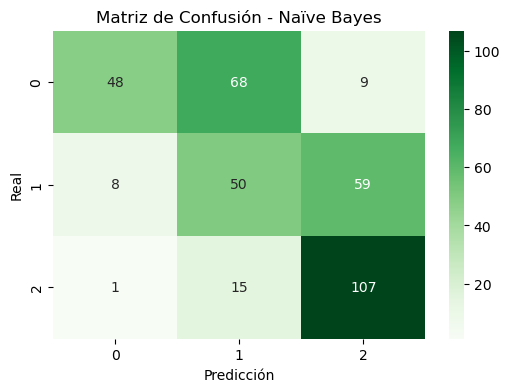

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# precision del modelo
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Resultados del modelo de Clasificación con Naïve Bayes:")
print(f"Accuracy: {accuracy_nb:.2f}")
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_nb))

# Matriz de confusión para visualizar los errores
import seaborn as sns
import matplotlib.pyplot as plt

# 0 = economica, 1 = intermedia, 2 = cara
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Naïve Bayes")
plt.show()


### Explicación de resultados obtenidos 

El modelo tiene una precisión del 56%, esto indica que acierta un poco más que la mitad de las predicciones. No es un valor muy alto. 

La clase 0 o económica presentó una precisión de 0.84 pero presentó un recall de 0.38 por lo que no detecta bien todas las casas económicas.

La clase 1 o intermedia tiene los peores valores de precisión y recall con 0.38 y 0.43. El modelo presenta dificultades significativas para distinguir esta clase.

La clase 2 o cara tiene un buena precisión de 0.87 y un recall aceptable de 0.61, indicando que si encuentra la mayoría de casas cara pero que presenta algunos errores en la predicción.

### Comparación de resultados de regresión linea y árbol de decisión

### ¿Qué modelo funcionó mejor?

### Modelo de Clasificación con Naïve Bayes

### Eficiencia de los algoritmos

### Análisis de eficiencia - Matriz de confusión

### Errores y su importancia

### ¿Existe un sobre ajuste del modelo?

### Modelo con validación cruzada

### Comparación del modelo con validación cruzada con los modelos anteriiores

### Uso de valores de hiperparámetros

### Comparación de eficiencia de algoritmos

### Conclusiones